In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## CLUSTERING WITH TWO FEATURES

In [112]:
df = pd.read_csv('/home/akeemlag/Downloads/SCFP2022.csv')
df

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,4603,46031,1705.225499,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22971,4603,46032,1713.918975,2,40,2,8,2,2,2,...,1,2,1,1,1,1,3,2,1,1
22972,4603,46033,1689.140933,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22973,4603,46034,1714.060239,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1


In [113]:
mask = df['TURNFEAR'] == 1
df_fear = df[mask]
df_fear

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,4603,46031,1705.225499,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22971,4603,46032,1713.918975,2,40,2,8,2,2,2,...,1,2,1,1,1,1,3,2,1,1
22972,4603,46033,1689.140933,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22973,4603,46034,1714.060239,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1


In [114]:
age_groups = df_fear['AGECL'].unique()
age_groups

array([1, 4, 2, 3, 5, 6])

In [115]:
agecl_dict = {
    1: 'Under 35',
    2: '35-44',
    3: '45-54',
    4: '55-64',
    5: '65-74',
    6: '75 or Older'
}

age_cl = df_fear['AGECL'].replace(agecl_dict)
age_cl.head()

20    Under 35
21    Under 35
22    Under 35
23    Under 35
24    Under 35
Name: AGECL, dtype: object

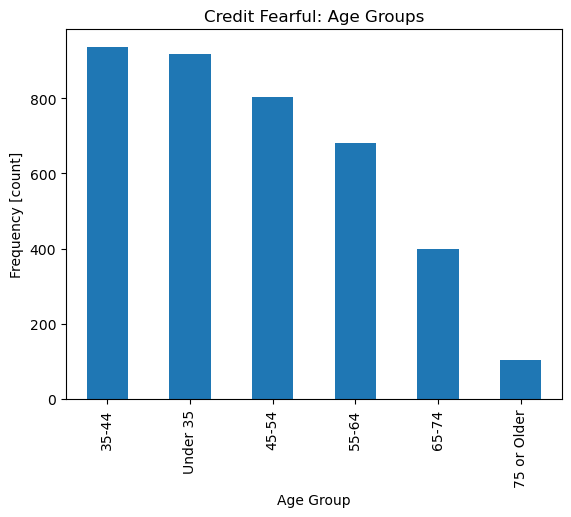

In [116]:
age_cl_value_counts = age_cl.value_counts()

age_cl_value_counts.plot(
    kind='bar',
    xlabel='Age Group',
    ylabel='Frequency [count]',
    title='Credit Fearful: Age Groups');

<AxesSubplot: >

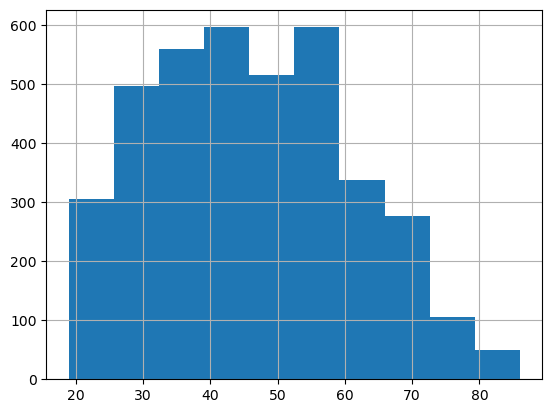

In [117]:
df_fear['AGE'].hist(bins=10)

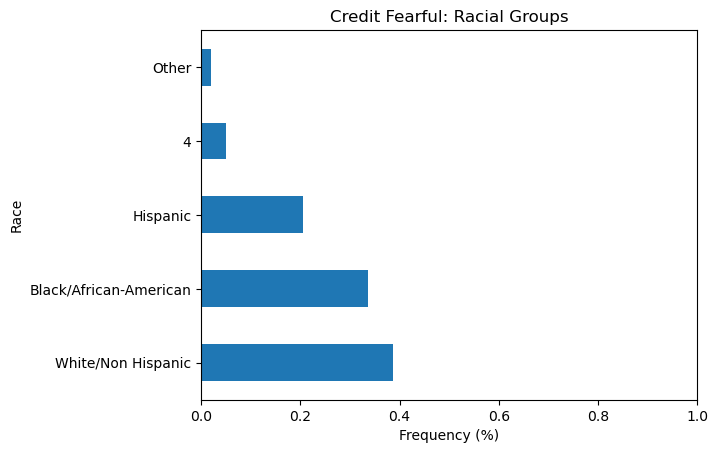

In [118]:
race_dict = {
    1: "White/Non Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other"
}

race = df_fear['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

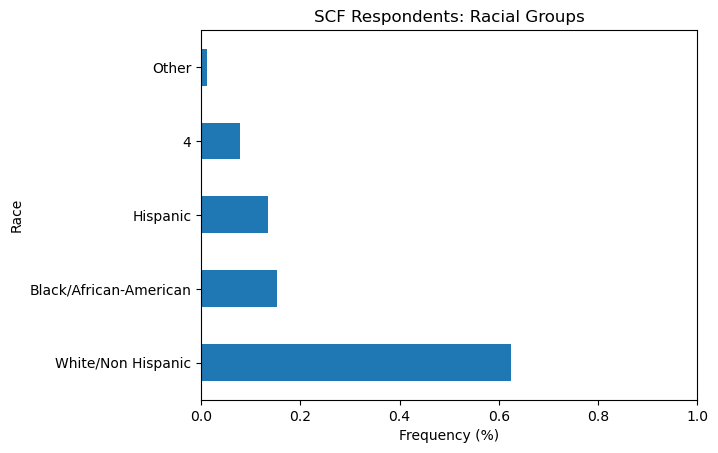

In [119]:
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

In [120]:
df.INCCAT.unique()

array([2, 5, 6, 4, 3, 1])

In [121]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}
df_incc = (df["INCCAT"]
        .replace(inccat_dict)
        .groupby(df["TURNFEAR"])
        .value_counts(normalize=True)
        .rename('frequency')
        .to_frame()
        .reset_index())

df_incc

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.303982
1,0,60-79.9,0.162312
2,0,40-59.9,0.144492
3,0,0-20,0.140050
4,0,21-39.9,0.139162
5,0,80-89.9,0.110002
6,1,0-20,0.340714
7,1,21-39.9,0.266476
8,1,40-59.9,0.205001
9,1,60-79.9,0.112529


In [122]:
df.groupby(['TURNFEAR'])['INCCAT'].value_counts(normalize=True).rename('frequency').reset_index()

,TURNFEAR,INCCAT,frequency
0,0,6,0.303982
1,0,4,0.162312
2,0,3,0.144492
3,0,1,0.140050
4,0,2,0.139162
5,0,5,0.110002
6,1,1,0.340714
7,1,2,0.266476
8,1,3,0.205001
9,1,4,0.112529


<AxesSubplot: xlabel='INCCAT', ylabel='frequency'>

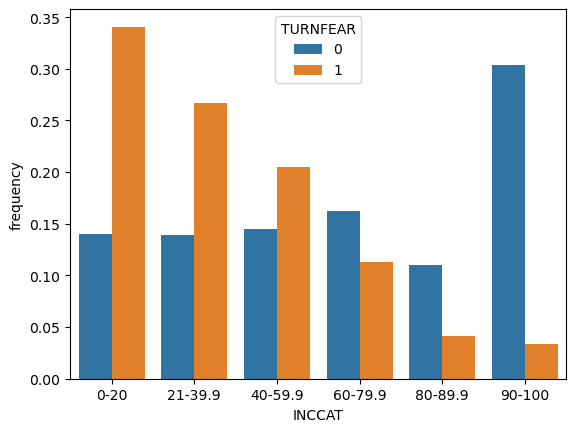

In [123]:
sns.barplot(x="INCCAT", y="frequency", hue="TURNFEAR", data=df_incc, order=inccat_dict.values())

In [124]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
asset_house_corr

0.5617763110086196

In [125]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
asset_house_corr

0.3649483861558831

In [126]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.561776,0.706685,0.307137,0.120137
HOUSES,0.561776,1.000000,0.384699,0.251876,0.186120
INCOME,0.706685,0.384699,1.000000,0.306534,0.096549
DEBT,0.307137,0.251876,0.306534,1.000000,0.086561
EDUC,0.120137,0.186120,0.096549,0.086561,1.000000


In [127]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df_fear[cols].corr()
corr
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.364948,0.893282,0.477171,0.110655
HOUSES,0.364948,1.000000,0.314501,0.676984,0.195174
INCOME,0.893282,0.314501,1.000000,0.456622,0.108845
DEBT,0.477171,0.676984,0.456622,1.000000,0.182570
EDUC,0.110655,0.195174,0.108845,0.182570,1.000000


In [128]:
df_educ = df.groupby('TURNFEAR')['EDUC'].value_counts(normalize=True).reset_index()


<AxesSubplot: xlabel='EDUC', ylabel='proportion'>

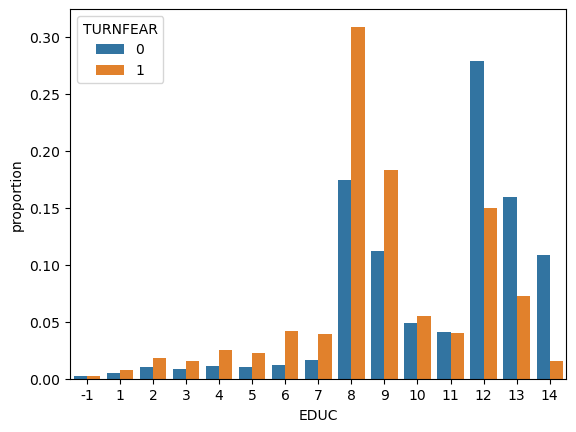

In [129]:
sns.barplot(data=df_educ, x="EDUC", y="proportion", hue="TURNFEAR")

<AxesSubplot: xlabel='INCOME', ylabel='ASSET'>

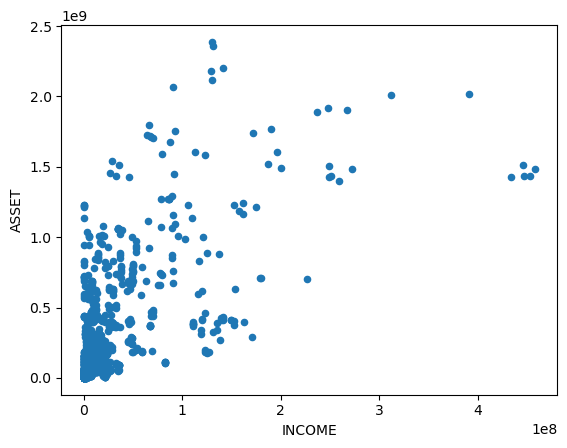

In [130]:
df.plot.scatter(x="INCOME", y="ASSET")

<AxesSubplot: xlabel='DEBT', ylabel='ASSET'>

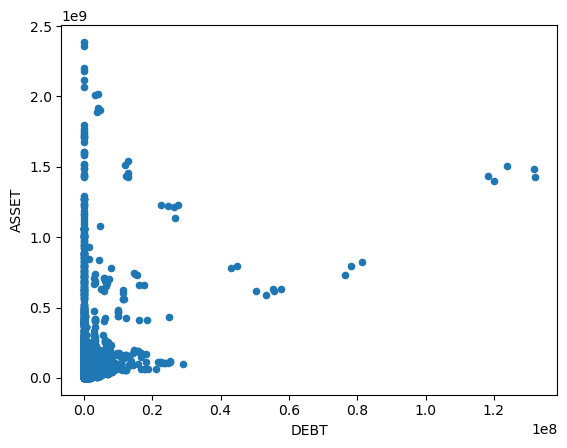

In [131]:
df.plot.scatter(x="DEBT", y="ASSET")

<AxesSubplot: xlabel='DEBT', ylabel='ASSET'>

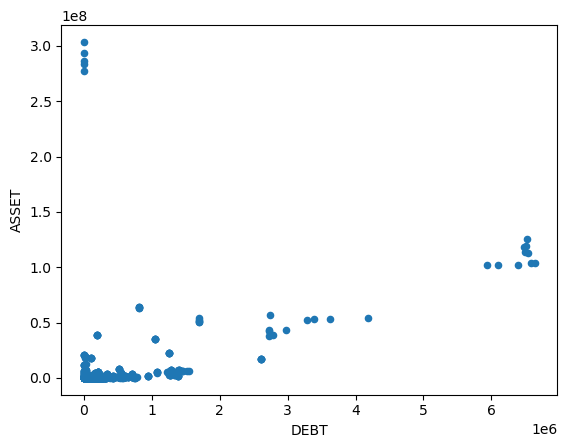

In [132]:
df_fear.plot.scatter(x="DEBT", y="ASSET")

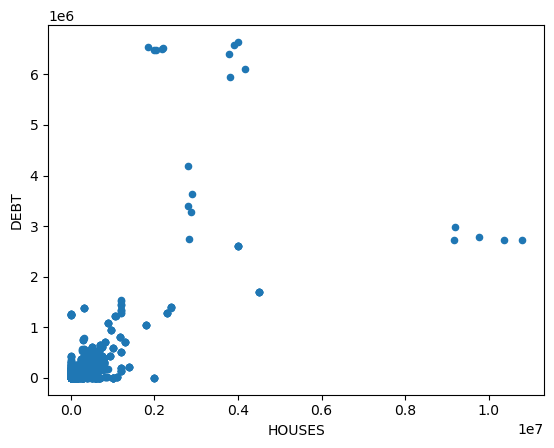

In [133]:
df_fear.plot.scatter(x="HOUSES", y="DEBT");

In [134]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    mask = df["TURNFEAR"] == 1
    return df[mask]

In [135]:
df = wrangle('/home/akeemlag/Downloads/SCFP2022.csv')

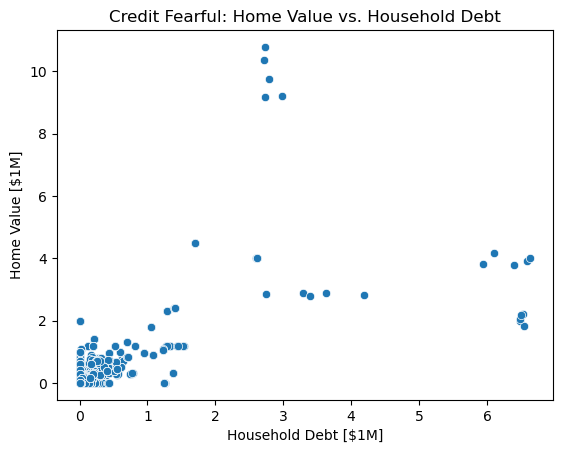

In [136]:
sns.scatterplot(x=df["DEBT"]/1e6, y=df["HOUSES"]/1e6)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [137]:
X = df[["DEBT", "HOUSES"]]
print(X.shape)
X.head()

(3839, 2)


,DEBT,HOUSES
20,11000,0
21,10000,0
22,10000,0
23,10000,0
24,11000,0


In [138]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [139]:
labels = model.labels_
labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

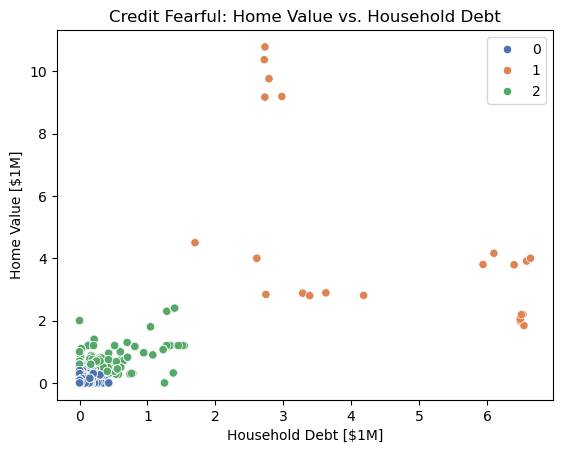

In [140]:
# Plot "HOUSES" vs "DEBT" with hue=label
sns.scatterplot(
    x=df["DEBT"] / 1e6,
    y=df["HOUSES"] /1e6,
    hue=labels,
    palette="deep"
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [141]:
centroids = model.cluster_centers_
centroids

array([[  43913.12611012,   42421.25518058],
       [3897703.33333333, 4530666.66666667],
       [ 424616.2412993 ,  718336.42691415]])

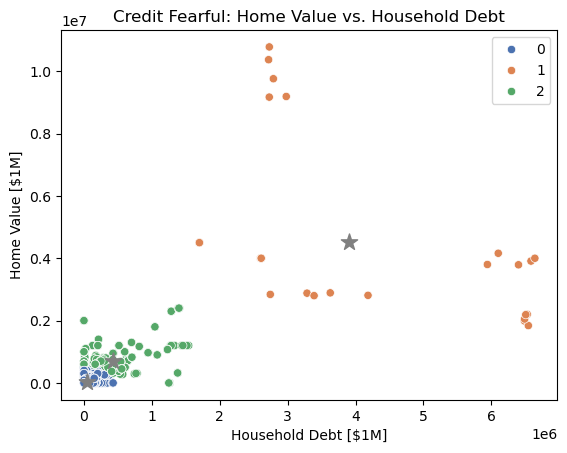

In [142]:
sns.scatterplot(
    x=df["DEBT"],
    y=df["HOUSES"],
    hue=labels,
    palette="deep"
)
plt.scatter(
    x=centroids[:, 0],
    y=centroids[:, 1],
    color="gray",
    marker='*',
    s=150
)

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [143]:
inertia = model.inertia_
inertia

475315192358408.9

In [144]:
ss = silhouette_score(X, labels=labels)
ss

0.7821383506051494

In [145]:
# Create a for loop to calculate inertia errors and ss
n_clusters = range(2, 13)
inertia_errors = []
ss = []

for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia_errors.append(model.inertia_)
    ss.append(silhouette_score(X, model.labels_))

print(f'inertia_score: {inertia_errors}')
print(f'Silhoutte score: {ss}')

inertia_score: [705340367647918.2, 475315192358408.9, 297915513890075.0, 228842081298077.84, 136770176464744.34, 119889514178543.73, 101712638232976.66, 84642380776828.72, 73444750137457.9, 64548508037457.89, 51861466968241.66]
Silhoutte score: [0.951905651526154, 0.7821383506051494, 0.7837672544244059, 0.751448172357047, 0.7532650364384775, 0.7491584862767527, 0.7237995995506894, 0.7107155962871663, 0.7075990034514861, 0.7081684171225633, 0.7116365486412618]


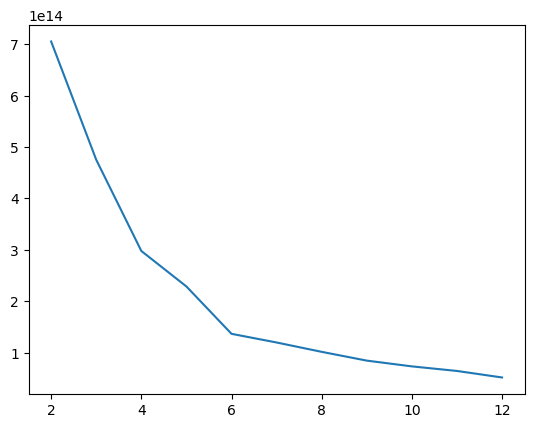

In [146]:
plt.plot(n_clusters, inertia_errors);

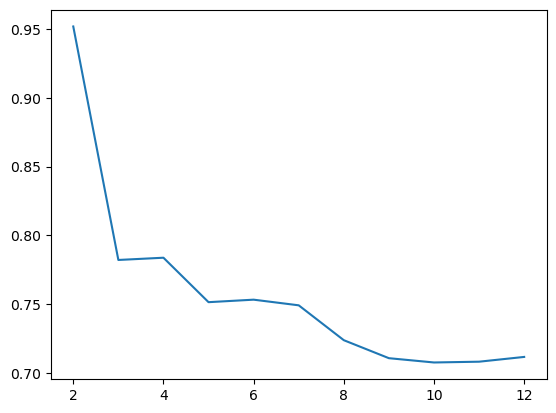

In [147]:
# plot for ss
plt.plot(n_clusters, ss);

In [148]:
final_model = KMeans(n_clusters=4, random_state=42)
final_model.fit(X)

KMeans(n_clusters=4, random_state=42)

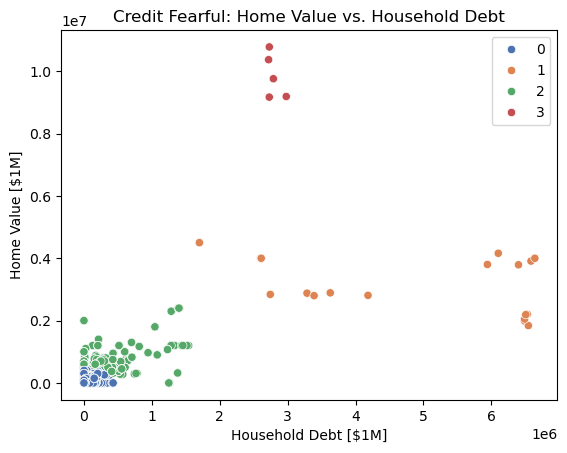

In [149]:
sns.scatterplot(
    x=df["DEBT"],
    y=df["HOUSES"],
    hue=final_model.labels_,
    palette="deep"
)

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [150]:
xgb = X.groupby(final_model.labels_).mean()
xgb

,DEBT,HOUSES
0,4.391313e+04,4.242126e+04
1,4.119400e+06,3.466000e+06
2,4.246162e+05,7.183364e+05
3,2.789220e+06,9.854000e+06


In [151]:
final_model.cluster_centers_

array([[  43913.12611012,   42421.25518058],
       [4119400.        , 3466000.        ],
       [ 424616.2412993 ,  718336.42691415],
       [2789220.        , 9854000.        ]])

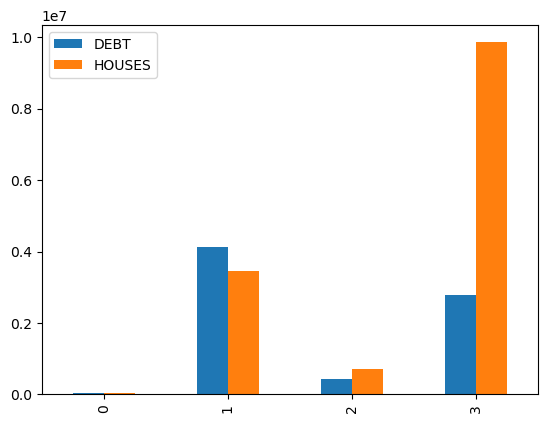

In [152]:
xgb.plot(kind="bar");

<AxesSubplot: >

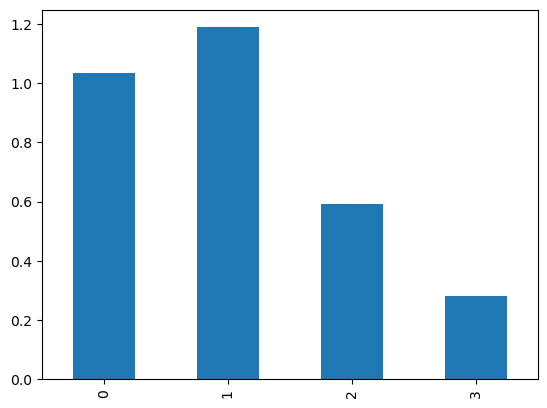

In [153]:
(xgb["DEBT"]/xgb["HOUSES"]).plot(
                 kind="bar"
                )

## CLUSTERING WITH MULTPLE FEATURES

In [154]:
import pandas as pd
import plotly.express as px
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_is_fitted

In [155]:
def wrangle(file_path):
    df = pd.read_csv(file_path)
    mask = (df["TURNFEAR"] == 1) & (df["NETWORTH"] < 2000000)
    df = df[mask]
    return df

In [156]:
df = wrangle('/home/akeemlag/Downloads/SCFP2022.csv')

In [157]:
print(df.shape)
df.head()

(3672, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2


We need to determine which features have the largest variance

In [158]:
df.var().sort_values(ascending=False).head(10).index

Index(['ASSET', 'NFIN', 'NETWORTH', 'KGTOTAL', 'HOUSES', 'KGBUS', 'NHNFIN',
       'DEBT', 'FIN', 'HOMEEQ'],
      dtype='object')

In [159]:
# Calc the variance to get the 10 largest features
top_top_var = df.var().sort_values(ascending=True).tail(10)
top_top_var

HOMEEQ      1.481548e+10
FIN         1.561213e+10
DEBT        1.988860e+10
NHNFIN      2.512559e+10
KGBUS       3.167079e+10
HOUSES      3.381911e+10
KGTOTAL     3.853314e+10
NETWORTH    6.670754e+10
NFIN        7.102944e+10
ASSET       1.102278e+11
dtype: float64

In [160]:
# Using plotly
fig = px.bar(
    x=top_top_var,
    y=top_top_var.index,
    title="SCF: High Variance Features"
)
fig.update_layout(xaxis_title="Variance", yaxis_title="Feature")

# fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([1.48154791e+10, 1.56121266e+10, 1.98886050e+10, 2.51255906e+10,
                          3.16707856e+10, 3.38191097e+10, 3.85331411e+10, 6.67075352e+10,
                          7.10294432e+10, 1.10227778e+11]),
              'xaxis': 'x',
              'y': array(['HOMEEQ', 'FIN', 'DEBT', 'NHNFIN', 'KGBUS', 'HOUSES', 'KGTOTAL',
                          'NETWORTH', 'NFIN', 'ASSET'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'SCF: High Variance Features'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Variance'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Feature'}}}
})

In [161]:
fig = px.box(data_frame=df, x="NHNFIN", title="Distribution of Non-home, NF")

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [88]:
# Usin scipy trimmed var
top_ten_trimmed_var = df.apply(trimmed_var).sort_values().tail(10)
top_ten_trimmed_var

NH_MORT     9.661827e+08
MRTHEL      9.885072e+08
KGTOTAL     9.963638e+08
PLOAN1      1.120744e+09
HOMEEQ      1.494964e+09
DEBT        2.775392e+09
NETWORTH    5.946834e+09
HOUSES      6.387043e+09
NFIN        1.258410e+10
ASSET       1.751559e+10
dtype: float64

In [90]:
# Using plotly
fig = px.bar(
    x=top_ten_trimmed_var,
    y=top_ten_trimmed_var.index,
    title="SCF: High Variance Features"
)
fig.update_layout(xaxis_title="Trimmed Variance", yaxis_title="Feature")


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([9.66182749e+08, 9.88507211e+08, 9.96363816e+08, 1.12074375e+09,
                          1.49496419e+09, 2.77539153e+09, 5.94683396e+09, 6.38704336e+09,
                          1.25841005e+10, 1.75155930e+10]),
              'xaxis': 'x',
              'y': array(['NH_MORT', 'MRTHEL', 'KGTOTAL', 'PLOAN1', 'HOMEEQ', 'DEBT', 'NETWORTH',
                          'HOUSES', 'NFIN', 'ASSET'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'SCF: High Variance Features'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Trimmed Variance'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Feature'}}}
})

In [92]:
high_var_cols = top_ten_trimmed_var.tail(5).index.to_list()
high_var_cols


['DEBT', 'NETWORTH', 'HOUSES', 'NFIN', 'ASSET']

#### SPLIT

In [179]:
X = df[high_var_cols]
print(X.shape)
X.head()

(3672, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
20,11000,4100.0,0,14000.0,15100.0
21,10000,5500.0,0,14000.0,15500.0
22,10000,4500.0,0,13000.0,14500.0
23,10000,5600.0,0,14000.0,15600.0
24,11000,4500.0,0,14000.0,15500.0


#### >>> BUILD MODEL

In [180]:
X_summary = X.aggregate(["mean", "std"]).astype(int)
X_summary

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
mean,72319,104823,86763,140926,177143
std,141026,258278,183899,266513,332005


In [181]:
ss = StandardScaler()

X_scaled_data = ss.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled_data, columns=X.columns)

X_scaled

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,-0.434870,-0.390036,-0.47186,-0.476313,-0.488142
1,-0.441961,-0.384615,-0.47186,-0.476313,-0.486937
2,-0.441961,-0.388487,-0.47186,-0.480065,-0.489950
3,-0.441961,-0.384227,-0.47186,-0.476313,-0.486636
4,-0.434870,-0.388487,-0.47186,-0.476313,-0.486937
...,...,...,...,...,...
3667,-0.512879,-0.405912,-0.47186,-0.528850,-0.533630
3668,-0.512879,-0.405912,-0.47186,-0.528850,-0.533630
3669,-0.512879,-0.405912,-0.47186,-0.528850,-0.533630
3670,-0.512879,-0.405912,-0.47186,-0.528850,-0.533630


#### >>> Build and Tune Model

In [182]:
n_clusters = range(2, 12)
inertia_errors = []
silhouette_scores = []

for k in n_clusters:
    model = make_pipeline(StandardScaler(), KMeans(n_clusters=k, n_init='auto'))
    model.fit(X)

    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    labels = model.named_steps["kmeans"].labels_
    silhouette_scores.append(silhouette_score(X, labels))

print(f'inertia errors: {inertia_errors}')
print(f'silhouette_score: {silhouette_scores}')

inertia errors: [8330.713703262287, 5668.186693086032, 4638.125329170423, 3721.8775181189876, 3523.0625873595823, 3113.953137723069, 2717.6755159147506, 2406.2195190442962, 2295.1434567795645, 2170.8233041165618]
silhouette_score: [0.7623318800335575, 0.6991628816143209, 0.6816110141663074, 0.6803924419657255, 0.646348033220925, 0.6590847729393319, 0.6440959858217643, 0.6429406898815339, 0.6533351600943399, 0.619239327526037]


In [168]:
fig = px.line(x=n_clusters, y=inertia_errors, title="K-means model");
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
              'xaxis': 'x',
              'y': array([3071.73505845, 2447.16476944, 1801.63926757,  874.38995557,
                           615.39615442,  505.30917773,  437.90424249,  388.25381894,
                           336.83746136,  278.06751007]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'K-means model'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [169]:
fig = px.line(x=n_clusters, y=silhouette_scores)
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
              'xaxis': 'x',
              'y': array([0.95190565, 0.90060577, 0.75138345, 0.77768725, 0.75495115, 0.73135389,
                          0.71792271, 0.69530588, 0.68805156, 0.71255292]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [183]:
final_model = make_pipeline(
    StandardScaler(), KMeans(n_clusters=5, n_init="auto", random_state=42)
)
final_model.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [184]:
labels = final_model.named_steps["kmeans"].labels_
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [187]:
grouped_label = X.groupby(labels).mean()
grouped_label

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,122366.188198,2.455941e+05,209612.440191,3.027779e+05,3.679603e+05
1,24488.532549,9.652937e+03,6850.680397,2.387923e+04,3.414147e+04
2,220124.153846,1.363878e+06,202800.000000,1.090103e+06,1.584002e+06
3,425148.203593,2.079625e+05,469688.622754,5.453325e+05,6.331107e+05
4,393013.297872,8.648728e+05,818297.872340,1.072186e+06,1.257886e+06


In [193]:
fig = px.bar(grouped_label, barmode="group")

fig.update_layout(xaxis_title="Clusters")
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=DEBT<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'DEBT',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'DEBT',
              'offsetgroup': 'DEBT',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0, 1, 2, 3, 4], dtype=int32),
              'xaxis': 'x',
              'y': array([122366.18819777,  24488.53254873, 220124.15384615, 425148.20359281,
                          393013.29787234]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'variable=NETWORTH<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'NETWORTH',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'NETWORTH',
              'offsetgroup': 'NETWORTH',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0, 1, 2, 3, 4], dtype=int32),
              'xaxis': 'x',
              'y': array([ 245594.13492823,    9652.93674145, 1363878.15384615,  207962.54491018,
                           864872.81914894]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'variable=HOUSES<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'HOUSES',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': 'HOUSES',
              'offsetgroup': 'HOUSES',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0, 1, 2, 3, 4], dtype=int32),
              'xaxis': 'x',
              'y': array([209612.44019139,   6850.6803972 , 202800.        , 469688.62275449,
                          818297.87234043]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'variable=NFIN<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'NFIN',
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': 'NFIN',
              'offsetgroup': 'NFIN',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0, 1, 2, 3, 4], dtype=int32),
              'xaxis': 'x',
              'y': array([ 302777.87655502,   23879.23133505, 1090103.07692308,  545332.51497006,
                          1072186.38297872]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'variable=ASSET<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'ASSET',
              'marker': {'color': '#FFA15A', 'pattern': {'shape': ''}},
              'name': 'ASSET',
              'offsetgroup': 'ASSET',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([0, 1, 2, 3, 4], dtype=int32),
              'xaxis': 'x',
              'y': array([ 367960.323126  ,   34141.46929018, 1584002.30769231,  633110.74850299,
                          1257886.11702128]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Clusters'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

#### Applying the PCA : Note, what we gain from dimensionality reduction we lose in explainability

In [197]:
pca = PCA(n_components=2, random_state=42) # Instantiate PCA

X_ft = pca.fit_transform(X)

X_pca = pd.DataFrame(X_ft, columns=["PC1", "PC2"])

print(X_pca.shape)

X_pca.head()

(3672, 2)


,PC1,PC2
0,-251204.231325,25992.793610
1,-250476.854167,27493.459458
2,-252087.985364,26975.015056
3,-250366.202109,27561.475569
4,-250761.623093,26264.858052


In [199]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
    data_frame=X_pca,
    x="PC1",
    y="PC2",
    color=labels.astype(str),
    title="PCA Represenation of Clusters"
)

fig.update_layout(xaxis_title="PC1", yaxis_title="PC2")

fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'color=1<br>PC1=%{x}<br>PC2=%{y}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '1',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([-251204.23132493, -250476.85416708, -252087.98536436, ...,
                          -271844.78254255, -271844.78254255, -271844.78254255]),
              'xaxis': 'x',
              'y': array([25992.7936098 , 27493.45945824, 26975.01505565, ..., 31501.01022997,
                          31501.01022997, 31501.01022997]),
              'yaxis': 'y'},
             {'hovertemplate': 'color=0<br>PC1=%{x}<br>PC2=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '0',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([593198.99799806, 591303.09787509, 591303.09787509, ..., 675396.19509648,
                          356718.26794539, 402266.80869987]),
              'xaxis': 'x',
              'y': array([165530.15852868, 163783.11271956, 163783.11271956, ..., 250641.68180032,
                           54755.28362006,  75423.78168647]),
              'yaxis': 'y'},
             {'hovertemplate': 'color=3<br>PC1=%{x}<br>PC2=%{y}<extra></extra>',
              'legendgroup': '3',
              'marker': {'color': '#00cc96', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '3',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([ 815625.84393896,  819459.20614369,  814092.34237289,  815005.05475256,
                           812455.25642107,  971792.33671056,  973735.42408195,  972396.05806244,
                           973403.46790783,  973564.58102756,  538263.34903672,  648277.52918694,
                           489724.73649361,  570259.55771436,  624245.53624446,  619199.05185896,
                           624894.43037288,  593569.8485463 ,  623373.1033875 ,  602967.22309427,
                           570747.93936339,  572684.36805812,  570121.44772686,  573253.90590951,
                           573538.67483521,  898607.00446651,  903918.30325237,  900204.78295236,
                           898434.35002374,  900930.69768532,  300091.4757396 ,  212392.51645482,
                           286717.30391994,  207170.55887555,  234138.42288847, 1130736.89061134,
                          1132901.28209881, 1134609.7126427 , 1133171.23588819, 1133281.88794623,
                          1231160.31109023,  678940.02461266,  679385.90665808,  679101.13773239,
                           677613.66234108,  676039.98845756,  974867.67169589,  764061.59413601,
                           907617.51061728,  756449.6633097 ,  967472.92196464,  606670.58593723,
                           606717.77318565,  608250.62443699,  604932.52512072,  604994.52750545,
                           620109.63708373,  624094.9225615 ,  622999.46718692,  622999.46718692,
                           622988.40198112,  289081.65982524,  816179.09348292,  816179.09348292,
                           816179.09348292,  816179.09348292,  816179.09348292,  941912.41928792,
                           924201.0413237 ,  946262.47352056,  927423.30371825,  947873.60471784,
                           386827.71306782,  380383.18827871,  380383.18827871,  363627.42382705,
                           377160.92588416,  773438.95870542,  770585.90944089,  773706.31594435,
                           773182.66667229,  776007.23904426,  214618.40675455,  177661.21380074,
                           186400.68754931,  169765.69012592,  196785.40409779,  763781.86570546,
                           765392.99690274,  765395.84459199,  765392.99690274,  765395.84459199,
                          1048903.9314905 , 10832